In [1]:
import mne                                                              # Librería de python para explorar, visualizar,
mne.set_log_level('WARNING')                                            # y analizar datos neurofisiológicos humanos.
import scipy.io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb                                                    
color = ['green', 'blue','red','cyan', 'magenta', 'yellow','k','w']     # Paleta de colores para diferenciar las ondas

import a_funciones as a_fun                                             # Funciones Alex

xlabel = 'Muestra'                                                      # Abscisas
ylabel = 'Amplitud (uV)'                                                # Ordenadas

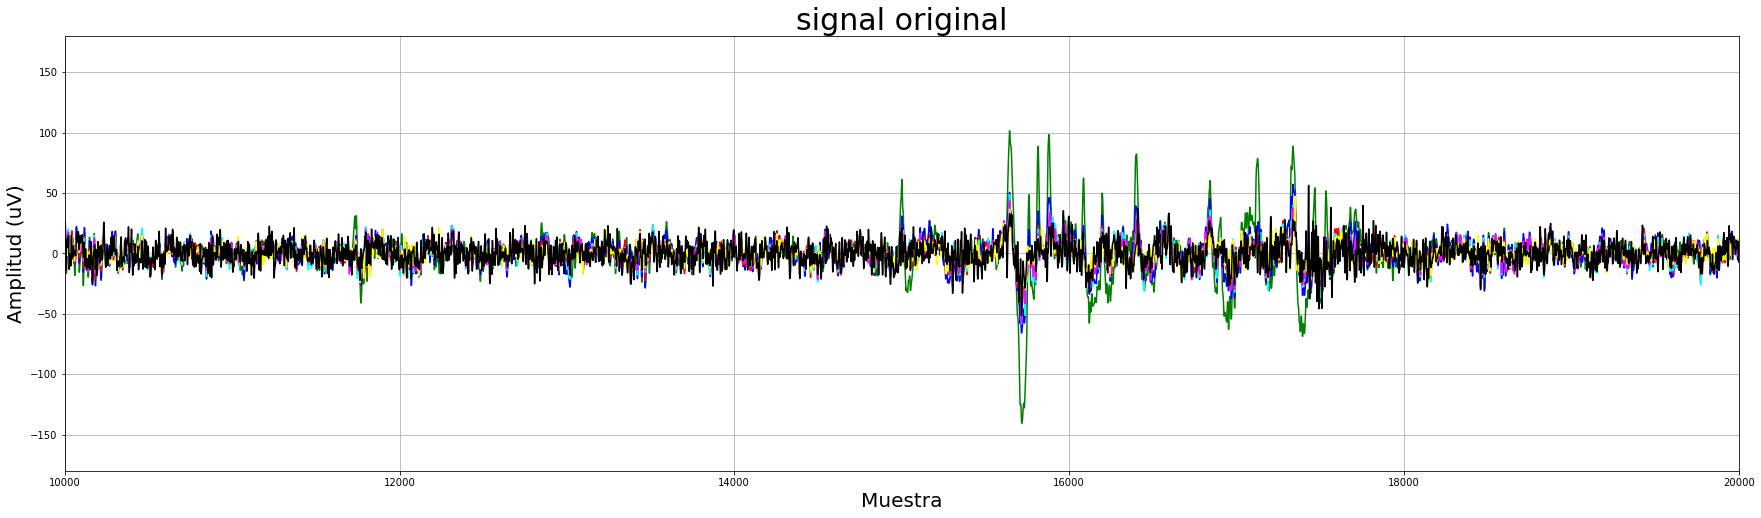

j:0 | Contenido de j:1
j:1 | Contenido de j:100000


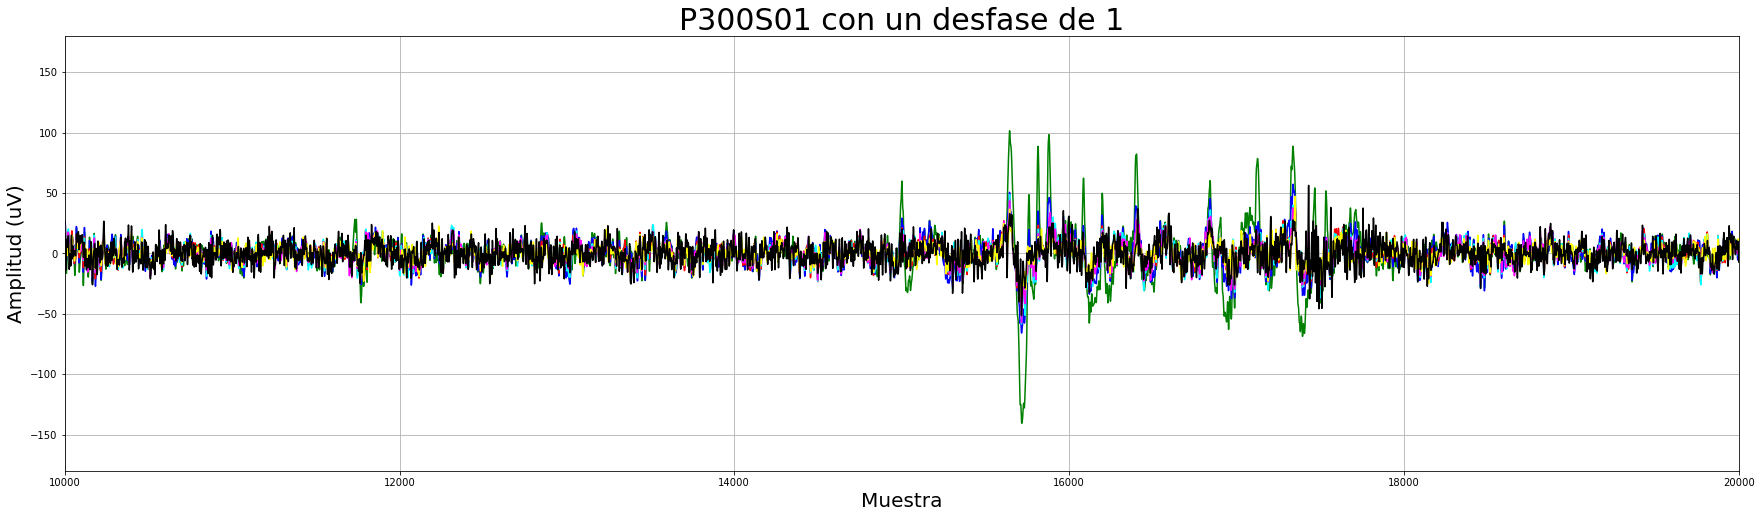

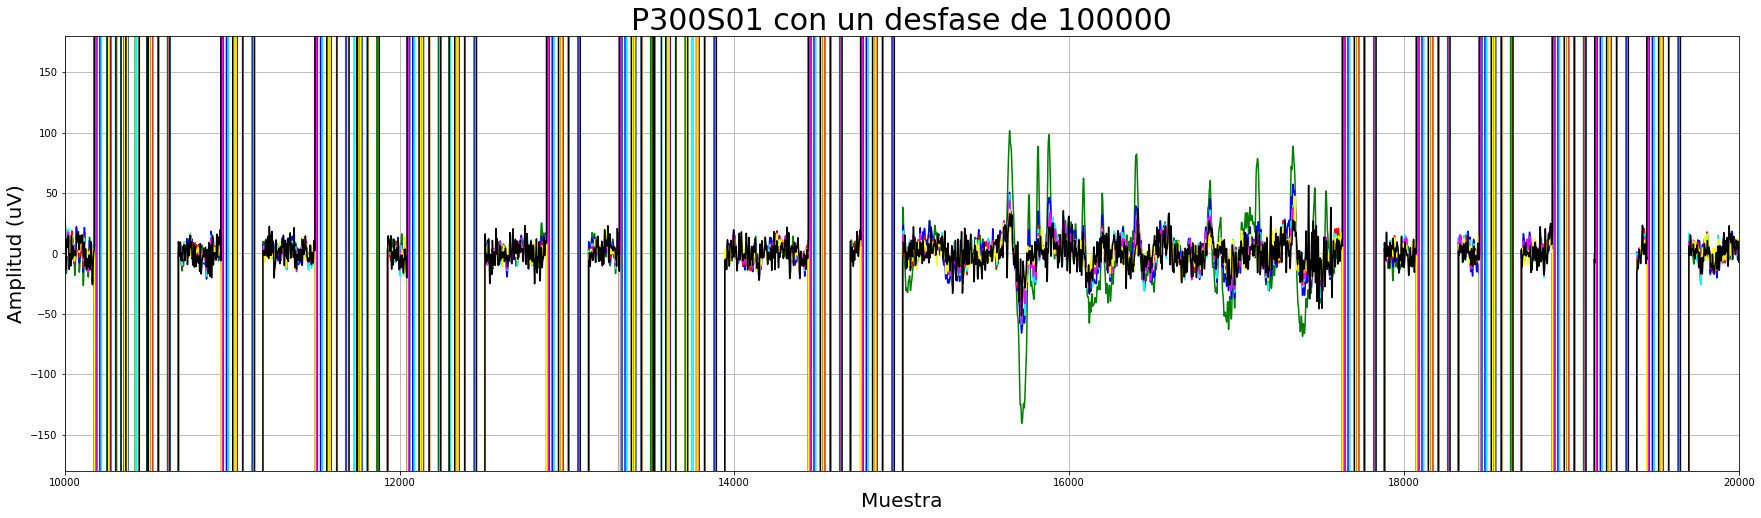

In [9]:
mat = scipy.io.loadmat('./dataset/ERPTemplate.mat')
routput = mat['routput']
erptemplate1 = routput[0][7][0][1][0][0][0][7] 
erptemplate1 = np.delete( erptemplate1, range(0,256,43),0)

punto_mat = scipy.io.loadmat('./dataset/itba/P300S01.mat') # P300S01 Pertenece al grupo pasivo. No tiene ERP.
signal = punto_mat['data'][0][0][0] 
#-------------------------------------
df_signal = a_fun.to_df(signal)
#-------------------------------------
titulo = 'signal original'
a_fun.grafic_8ch_test(df_signal, titulo, xlabel, ylabel)  
#-------------------------------------
#t_trials = punto_mat['data'][0][0][3]
t_flash = punto_mat['data'][0][0][4]
#t_stim = mat['data'][0][0][2]
#t_type = mat['data'][0][0][1]

lag_flash = [1,100000] # ,100,-50]
meta_P300S01 = np.empty(len(lag_flash), dtype=object)
for j,lag in enumerate(lag_flash):   
    print(f'j:{j} | Contenido de j:{lag}')
    punto_mat = scipy.io.loadmat('./dataset/itba/P300S01.mat')
    signal = punto_mat['data'][0][0][0] 
    for i in range(0,4200):
        if (t_flash[i,3]==2):
            signal[t_flash[i,0]-1:t_flash[i,0]+250-1,:] += (erptemplate1*lag)
    
    #signal = punto_mat['data'][0][0][0] 
    meta_P300S01[j] = signal
    
np.savetxt('./a_results/meta_P300S01.csv', meta_P300S01, delimiter=',',fmt='%s')

#df_meta_P300S01 = a_fun.to_df(meta_P300S01)
#df_meta_P300S01.to_csv('./a_results/meta_P300S01.csv', index=False)

for j, cont_P300S01 in enumerate(meta_P300S01):   
    df = a_fun.to_df(cont_P300S01)
    titulo = (f'P300S01 con un desfase de {lag_flash[j]}')
    a_fun.grafic_8ch_test(df, titulo, xlabel, ylabel)  



In [ ]:

#-------------------------------------
def DrugSignal(signal, t_flash):
    for i in range(0,4200):
        if (t_flash[i,3]==2):
            signal[t_flash[i,0]-1:t_flash[i,0]+250-1,:] += (erptemplate1*3)
    return signal
#-------------------------------------
'''
mult_erp = np.array([1, 50, 100]) #, 200, 400]) # mult_erp: Vector que contiene los multiplicadores para ampliar el ERP. 
vector_signal = np.array()
# Por a hora DrugSignal2 NO está funcionando.
def DrugSignal2(signal, t_flash, mult_erp):
    for i in range(0,mult_erp.size):
        for j in range(0,4200):
            if (t_flash[j,3]==2):
                signal[t_flash[j,0]-1:t_flash[j,0]+250-1,:] += (erptemplate1*mult_erp[i])
        vector_signal[i]=signal                
    return vector_signal
'''
#-------------------------------------
# Pacientes para el experimento PASIVO: P300S01,02,03,06. | Pacientes para el experimento ACTIVO: P300S04, 05, 07 y 08.
# files_path_itba_test = ['./dataset/itba/P300S01.mat', './dataset/itba/P300S02.mat']
files_path_itba_test = ['./dataset/itba/P300S01.mat', './dataset/itba/P300S02.mat', './dataset/itba/P300S03.mat', './dataset/itba/P300S04.mat', 
                    './dataset/itba/P300S05.mat', './dataset/itba/P300S06.mat', './dataset/itba/P300S07.mat', './dataset/itba/P300S08.mat']
'''
files_path_itba = ['./dataset/itba/P300S01.mat', 
                    './dataset/itba/P300S02.mat',
                    './dataset/itba/P300S03.mat', 
                    #'./dataset/itba/P300S04.mat', 
                    # './dataset/itba/P300S05.mat',
                    './dataset/itba/P300S06.mat']
                    #, 
                    # './dataset/itba/P300S07.mat', 
                    # './dataset/itba/P300S08.mat']
'''
files_path_bnci = ['./dataset/bnci/A01.mat', './dataset/bnci/A02.mat', './dataset/bnci/A03.mat', './dataset/bnci/A04.mat',
              './dataset/bnci/A05.mat', './dataset/bnci/A06.mat', './dataset/bnci/A07.mat', './dataset/bnci/A08.mat']
#-------------------------------------
for ii, path in enumerate(files_path_itba_test):   
    results_mne=f'./a_results/Paciente P300S0{ii+1}.csv' # Si necesitás, con cambiar la extensión a.txt es suficiente
    file_temp=open(results_mne,"w") 
    print(f'Paciente P300S0{ii+1},', file=file_temp) # COLUMNA0.
    punto_mat=scipy.io.loadmat(path)
    signal = punto_mat['data'][0][0][0] 
    t_trials = punto_mat['data'][0][0][3]
    t_flash = punto_mat['data'][0][0][4]
#-------------------------------------
# NOTA IMPORTANTE: SI DROGÁS LA SEÑAL ES PORQUE ESTÁS USANDO UNA TRAZA EEG DE PACIENTES EN MODALIDAD PASIVA.
# Es decir, que no se están enfocando en nada particular. Con éstos EEG + ERP se crea el dataset sintético.
#-------------------------------------
#    signal = DrugSignal(signal, t_flash)
#-------------------------------------
    t_stim = punto_mat['data'][0][0][2]
    t_type = punto_mat['data'][0][0][1]
    #-------------------------------------
    ch_names=[ 'Fz'  ,  'Cz',    'P3' ,   'Pz'  ,  'P4'  ,  'PO7'   , 'PO8'   , 'Oz']
    ch_types= ['eeg'] * signal.shape[1]
    ch_names_events = ch_names + ['t_stim']+ ['t_type']
    ch_types_events = ch_types + ['misc'] + ['misc']
    #-------------------------------------
    #info = mne.create_info(ch_names, 250, ch_types=ch_types)
    #eeg_mne = mne.io.array.RawArray(signal.T, info)
    signal_events = np.concatenate([signal, t_stim, t_type],1)
    info_events = mne.create_info(ch_names_events,250, ch_types_events)
    eeg = mne.io.RawArray(signal_events.T, info_events)
    #-------------------------------------
    #fig=eeg.plot_psd()
    eeg.filter(1,20)
    #fig=eeg.plot_psd()
    event_times = mne.find_events(eeg, stim_channel='t_type') 
    print(f'Eventos coincidentes encontrados (sin tmin & tmax), {event_times[:,0].size}', file=file_temp) # También se puede obtener con {len(event_times)}
    print(f'IDs de los eventos, {np.max(event_times[:,2])}', file=file_temp)
    #eeg.plot(scalings='auto',n_channels=8,events=event_times,block=True)   # scalings=10e-05
    #-------------------------------------
    if (np.unique(t_flash[:,0]).shape[0] != 4200):                          # evalúa si el "sample point id" de t_flash tiene el tamaño correcto.
        u,c = np.unique( t_flash[:,0], return_counts=True)                  # u->Los elementos únicos. c->la cantidad de veces que se repiten.
        dup = u[c>1]                                                        # dup->Los que estén repetidos mas de una vez.    
        
        for i in range(dup.shape[0]):
            idx = np.where( t_flash[:,0] == dup[i] )[0][0]
            t_flash[idx,0]  -= 1
            t_flash[idx,1]  = 1
            t_type[t_flash[idx,0]] = t_flash[idx,3]
            t_stim[t_flash[idx,0]] = t_flash[idx,2]

    np.unique(t_flash[:,0]).shape
    assert  np.unique(t_flash[:,0]).shape[0] == 4200, 'Problem with experiment structure.  There aren''t enough events.'
    #-------------------------------------    
    def getstims(eeg_mne, eeg_events):
        '''
        Get the stimulations.  These are the FLASHINGS of rows and columns.
        '''
        tmin = 0
        tmax = 0.8
        reject = None
        event_times = mne.find_events(eeg_events, stim_channel='t_stim',shortest_event=0, verbose=True, min_duration=0.000001, consecutive=True)
        #np.savetxt(file_temp, event_times, fmt='%d')
        print(f'Eventos coincidentes encontrados (con tmin:0 & tmax:0.8), {event_times[:,0].size}', file=file_temp) # También se puede obtener con {len(event_times)}
        print(f'IDs de los eventos, {np.max(event_times[:,2])}', file=file_temp)
                        
        event_id = {'Row1':1,'Row2':2,'Row3':3,'Row4':4,'Row5':5,'Row6':6,'Col1':7,'Col2':8,'Col3':9,'Col4':10,'Col5':11,'Col6':12}

        epochs = mne.Epochs(eeg_mne, event_times, event_id, tmin, tmax, proj=False,
                        baseline=None, reject=reject, preload=True,
                        verbose=True, reject_by_annotation=None)
        
        stims = event_times[:,-1]
        
        #df_event_times = a_fun.to_df(event_times)    
        #df_event_times.to_csv(f'./a_results/event_times_P300S0{ii+1}.csv', index=False)
        return [epochs,stims]
    #-------------------------------------    
    stimepochs, stims = getstims(eeg, eeg)
    #-------------------------------------    
    '''
    print('1///--------------------------------------')
    print(f'{event_times[:,0].size} matching events found | {np.max(event_times[:,2])} Event IDs', file=file_temp)
    print(f'stimepochs: {stimepochs} | stims: {stims}', file=file_temp)
    #-------------------------------------
    # HAY MAS INFO PERO POR AHORA NO LO GUARDAMOS EN EL ARCHIVO: print(f'getstims -> stimepochs, {stimepochs}', file=file_temp)
    #-------------------------------------
    print('---------------')
    print(f'stims: \n {stims}', file=file_temp)
    #-------------------------------------
    # HAY MAS INFO PERO POR AHORA NO LO GUARDAMOS EN EL ARCHIVO: print(f'getstims -> stims, {stims}', file=file_temp)
    #-------------------------------------
    print(stimepochs, stims)
    print('2///--------------------------------------')
    print('--------------------------------------Stimepochs:')
    print(stimepochs)
    print('Stims:', file=file_temp)
    print(stims)
    print(f'--------------- FIN Función: getstims --------------- \n ', file=file_temp)
    df_getstims_epochs = a_fun.to_df(epochs)
    df_getstims_epochs.to_csv(f'./dataset/itba/getstims_epochs_P300S0{ii+1}.csv', index=False)
    df_getstims = a_fun.to_df(stims)
    df_getstims.to_csv(f'./dataset/itba/getstims_P300S0{ii+1}.csv', index=False)
    '''
    #-------------------------------------    
    def getlabels(eeg_mne, eeg_events, event_id):
        print(f'Etiqueta hit/no hit. flash de fil/col seleccionados \n si son los que van a desencadenar la respuesta P300 o no.\n-----------------------------------')
        '''
        Get the hit/no hits labels.  These are the FLASHINGS of rows and columns but selected if they are the ones that will
        trigger the P300 response or not.
        '''
        #event_id = { 'first':1, 'second':2 }
        #baseline = (0.0, 0.2)
        #reject = {'eeg': 70 * pow(10,6)}
        tmin = 0
        tmax = 0.8
        reject = None
        event_times = mne.find_events(eeg_events, stim_channel='t_type', shortest_event=0, verbose=True, min_duration=0.000001, consecutive=True)
        #print(f'{event_times[:,0].size} matching events found | {np.max(event_times[:,2])} Event IDs', file=file_temp)
        #print(f'Eventos coincidentes encontrados, {event_times[:,0].size}', file=file_temp)
        #print(f'IDs de los eventos, {np.max(event_times[:,2])}', file=file_temp)
        epochs = mne.Epochs(eeg_mne, event_times, event_id, tmin, tmax, proj=False,
                        baseline=None, reject=reject, preload=True,
                        verbose=True, reject_by_annotation=None)
        labels = epochs.events[:, -1]
        return [epochs, labels]
    #-------------------------------------    
    epochs, labels = getlabels(eeg, eeg, {'first':1}) # -> {'first':1}: Nohits.
    # Tupla de tres valores: epochs.get_data().shape . Tomo uno por uno
    print(f'getlabels Nohits {ii+1} -> epochs, {(epochs.get_data().shape)[0]}', file=file_temp)
    print(f'getlabels Nohits {ii+1} -> Channels, {(epochs.get_data().shape)[1]}', file=file_temp)
    print(f'getlabels Nohits {ii+1} -> Time, {(epochs.get_data().shape)[2]}', file=file_temp)
    print(f'getlabels Nohits {ii+1} -> labels (longitud), {len(labels)}', file=file_temp)
    # epocked: Objeto de tipo <class 'mne.evoked.EvokedArray'>. 
    # En epocked.data puedo sacar info pero por ahora no hay nada. 
    # El profesor lo usa para visualizar: evoked.plot(). De acá se pueden sacar segmentos promedio.
    epocked = epochs.average()
    #-------------------------------------  
    epochs, labels = getlabels(eeg, eeg, {'second':2}) # -> {'second':2}: Hits.
    print(f'getlabels Hits {ii+1} -> epochs, {(epochs.get_data().shape)[0]}', file=file_temp)
    print(f'getlabels Hits {ii+1} -> Channels, {(epochs.get_data().shape)[1]}', file=file_temp)
    print(f'getlabels Hits {ii+1} -> Time, {(epochs.get_data().shape)[2]}', file=file_temp)
    print(f'getlabels Hits {ii+1} -> labels (longitud), {len(labels)}', file=file_temp)
    epocked = epochs.average()
    #-------------------------------------    
    '''
    print(f'Esto es para el preprocesamiento de los modelos:', file=file_temp)
    epochs, labels = getlabels(eeg, eeg, { 'first':1, 'second':2})
    print(f'call#3_getlabels{ii+1} -> epochs, {epochs}', file=file_temp)
    print(f'call#3_getlabels{ii+1} -> labels, {labels}', file=file_temp)
    #print(f'Epochs:{epochs}', file=file_temp)
    #print(f'Labels:{labels}', file=file_temp)
    # Downsample the original FS=250 Hz signal to >>> 20 Hz
    #epochs.resample(20, npad="auto")
    #stimepochs.resample(20, npad="auto")
    #print(f'--------------- FIN Función: getlabels --------------- \n ', file=file_temp)
    repetitions=120
    '''
    #-------------------------------------
    #df_signal = pd.DataFrame(punto_mat['data'][0][0][0])  
    #df_t_trials = pd.DataFrame(punto_mat['data'][0][0][3]) 
    #df_ t_flash = pd.DataFrame(mat['data'][0][0][4])
    #df_t_stim = pd.DataFrame(mat['data'][0][0][2])
    #df_t_type = pd.DataFrame(mat['data'][0][0][1])
    #-------------------------------------
    '''
    #print(f'-------------------------------------- \n TRANSFORMACIÓN A DATA FRAMES, por ahora no. \n--------------------------------------', file=file_temp)
    print(f'-----------eeg_crudo, Paciente P300S0{ii+1} -----------------', file=file_temp)
    eeg_crudo=eeg.get_data()
    eeg_crudo=eeg_crudo.T
    primeras_filas_eeg_crudo = eeg_crudo[:5]
    print(primeras_filas_eeg_crudo)
    print(f'-----------type(eeg_crudo),Paciente P300S0{ii+1} ------------', file=file_temp)
    print(type(eeg_crudo))
    print(f'-----------types: df_alex & df_eeg,Paciente P300S0{ii+1} ----', file=file_temp)
    df_alex = pd.DataFrame(eeg_crudo)       #<RawArray | 10 x 358372 (1433.
    df_eeg = a_fun.to_df(eeg_crudo)
    print(type(df_alex),file=file_temp)
    print(type(df_eeg),file=file_temp)
    print(df_eeg.columns,file=file_temp)
    print(f'-----------df_alex, Paciente P300S0{ii+1} --------------------', file=file_temp)
    print(df_alex.head(5),file=file_temp)
    print(f'-----------df_eeg, Paciente P300S0{ii+1} --------------------', file=file_temp)
    print(df_eeg.head(5), file=file_temp)
    print('------------------------------------------------------------------------------------------------------------------', file=file_temp)

    print(' \n \n \n \n BLA BLA BLA--------------------------------------------------------------------------------------------------- \n \n', file=file_temp)
    print(f'{type(df_alex)} \n {type(df_eeg)} \n {df_eeg.columns} \n -----------df_alex, Paciente P300S0{ii+1} -------------------- \n {df_alex.head(5)}, \n ----------------------------------- \n {df_eeg.head(5)} \n ------------------------------------------------------------------------------------------------------------------', file=file_temp)
    
    #-------------------------------------
    ch_names_alex=['Fz','Cz','P3' ,'Pz','P4','PO7','PO8','Oz','sample']
    ch_names_alex_events=['Fz','Cz','P3' ,'Pz','P4','PO7','PO8','Oz','t_stim','t_type','sample'] 
    #-------------------------------------
    df_eeg.columns = ch_names_alex_events
    df_eeg.to_csv(f'./a_results/df_eeg_P300S0{ii+1}.csv', index=False)
    #-------------------------------------
    df_signal = a_fun.to_df(signal)
    ch_names_alex=['Fz','Cz','P3' ,'Pz','P4','PO7','PO8','Oz','sample']
    df_signal.columns = ch_names_alex
    df_signal.to_csv(f'./a_results/signals_P300S0{ii+1}.csv', index=False)       #df_t_trials.to_csv(f'./dataset/itba/Trials__P300S0{i+1}.csv', index=False)
    #-------------------------------------
    df_signal_events = a_fun.to_df(signal_events)    
    df_signal_events.columns = ch_names_alex_events
    df_signal_events.to_csv(f'./a_results/signal_events_P300S0{ii+1}.csv', index=False)
    '''
    #-------------------------------------
    file_temp.close()
    #-------------------------------------

In [ ]:
    #punto_mat=scipy.io.loadmat(path)
    #signal = punto_mat['data'][0][0][0] 
    #t_trials = punto_mat['data'][0][0][3]
    #t_flash = punto_mat['data'][0][0][4]
    #print(f'ESTOY TESTEANDO EL DRUGSIGNAL{ii+1}')
    #signal = DrugSignal(signal, t_flash)
    #t_stim = punto_mat['data'][0][0][2]
    #t_type = punto_mat['data'][0][0][1]
    #-------------------------------------
    #ch_names=[ 'Fz'  ,  'Cz',    'P3' ,   'Pz'  ,  'P4'  ,  'PO7'   , 'PO8'   , 'Oz']
    #ch_types= ['eeg'] * signal.shape[1]
    #ch_names_events = ch_names + ['t_stim']+ ['t_type']
    #ch_types_events = ch_types + ['misc'] + ['misc']
    #-------------------------------------
    #info = mne.create_info(ch_names, 250, ch_types=ch_types)
    #eeg_mne = mne.io.array.RawArray(signal.T, info)
    #signal_events = np.concatenate([signal, t_stim, t_type],1)
    #print('-----------------info_events---------------------')
    #info_events = mne.create_info(ch_names_events,250, ch_types_events)
    #print(info_events)
    #print('-----------------eeg---------------------')
    #eeg = mne.io.RawArray(signal_events.T, info_events)
    #print(eeg)
    #print('-----------------eeg_crudo-----------------')
    #eeg_crudo=eeg.get_data()
    #df_alex = pd.DataFrame(eeg_crudo)
    #<RawArray | 10 x 358372 (1433.
    #df_eeg = a_fun.to_df(eeg_crudo)
    
df_eeg = a_fun.to_df(eeg_crudo)
signal_events

In [ ]:
#import mne
#mne.set_log_level('WARNING')
#import scipy.io
#import numpy as np

# First load the template.  This is the signal that will be used to DRUG the basal EEG stream.
mat = scipy.io.loadmat('./dataset/ERPTemplate.mat')

routput = mat['routput']

# In this ERPTemplate, there are two different template signals that are good.
erptemplate1 = routput[0][7][0][1][0][0][0][7] 
erptemplate2 = routput[0][7][0][1][0][0][0][0] 

# The original ERPTemplate dataset has a sampling frequency of 256 so I need to perform a small downsampling to 250 Hz
erptemplate1 = np.delete( erptemplate1, range(0,256,43),0)
erptemplate2 = np.delete( erptemplate2, range(0,256,43),0)

# Use this for testing  (get a ZERO signal)
#erptemplate1 = np.zeros((250,8))

# Randomize amplitude and jitter.
# Find the right locations where this should be inserted in the stream.
# Insert the signal mantaining the continiuity of the EEG.
def DrugSignal(signal, t_flash):
    '''
    Randomize amplitude and jitter
    Find the right locations where this should be inserted in the stream
    Insert the template mantaining the continuity and physiological meaning of the EEG
    '''
    for i in range(0,4200):
        if (t_flash[i,3]==2):
            signal[t_flash[i,0]-1:t_flash[i,0]+250-1,:] += (erptemplate1*3)

    return signal

#========================================================================================
#========================================================================================
#========================================================================================
#========================================================================================
#.
#.
#.
#========================================================================================
#========================================================================================
#========================================================================================
#========================================================================================

# Now load the basal EEG stream
#mat = scipy.io.loadmat('./dataset/p300-subject-25.mat')
mat = scipy.io.loadmat('./dataset/itba/P300S01.mat')
#mat = scipy.io.loadmat('./dataset/p300-subject-26.mat')
#mat = scipy.io.loadmat('/Users/rramele/./GoogleDrive/Data/P300/p300-subject-21.mat')
#mat = scipy.io.loadmat('/Users/rramele/./GoogleDrive/Data/P300/p300-subject-06.mat')

# In[1]:

# coding: latin-1
# Data point zero for the eight channels.  Should be in V.
signal = mat['data'][0][0][0] 
print(f'Tamaño de {len(signal)}')
#* pow(10,6)

# Trials
t_trials = mat['data'][0][0][3]

# Flash matrix
t_flash = mat['data'][0][0][4]

signal = DrugSignal(signal, t_flash)

t_stim = mat['data'][0][0][2]
t_type = mat['data'][0][0][1]

In [ ]:
print(f'Tamaño de {len(t_trials)}')
print(f'Tamaño de {len(t_flash)}')
print(f'Tamaño de {len(t_stim)}')
print(f'Tamaño de {len(t_type)}')

In [ ]:
type(t_type)



Acá puedo revisar esta guia -> [*Guía*](https://github.com/faturita/python-nerv/blob/master/MNE%20BNCI%20Horizon%202020%20Dataset%20008-2014.ipynb)    



### Análisis de DrugSignal.py, parte II  
  
En *a_analisis_funcion_DrugSignal.ipynb* se llega a drogar la señal con variaciones en la amplitud y fase.  
A continuación la preparación de los datos para ser visualizados con la librería de python mne.  
  
[*Creating data objects from arrays. mne library*](https://mne.tools/stable/creating_from_arrays.html)  
  
- Una instancia básica de información llamada *info_events*:  
Esta contiene el nombre de los canales, el ratio de muestreo y el canal de datos.  
Para éste caso no se usará canal de datos, por eso se carga *ch_types_events* con ['misc'].  
  
- Un objeto "en crudo" a partir de un array de numpy llamado *eeg*.  

- Un tercer objeto *event_times* que trae la info completa y además agrega el 't_type',
profundizado en [*a_analisis_p300subject25_stim&type.ipynb*](a_analisis_p300subject25_stim&type.ipynb).

Al finalizar, tendremos un objeto *eeg* que contiene todo:  
La señal drogada, *t_stim* y *t_type* y sus respectivos eventos.

In [ ]:
ch_names=['Fz','Cz','P3','Pz','P4','PO7','PO8', 'Oz']                   # Los nombres de los canales
ch_types= ['eeg'] * signal.shape[1]                                     # Un vector de tamaño 8 con el'eeg' repetido
ch_names_events = ch_names + ['t_stim']+ ['t_type']                     # Le agrega  't_stim' y't_type' 
ch_types_events = ch_types + ['misc'] + ['misc']                        # Le agrega dos 'misc': 
                                                                        # Channel types, default is 'misc' which is not a data channel. 
                                                                        # Currently supported fields are ‘ecg’, ‘bio’, ‘stim’, ‘eog’, ‘misc’, 
                                                                        # ‘seeg’, ‘dbs’, ‘ecog’, ‘mag’, ‘eeg’, ‘ref_meg’, ‘grad’, ‘emg’, ‘hbr’ or ‘hbo’. 
                                                                        # If str, then all channels are assumed to be of the same type.
#info = mne.create_info(ch_names, 250, ch_types=ch_types)
#eeg_mne = mne.io.array.RawArray(signal.T, info)

signal_events = np.concatenate([signal, t_stim, t_type],1)              # Se agrega a la señal drogada 't_stim' y 't_type'

df_signal_events = a_fun.to_df(signal_events)
ch_names_events_with_sample = ch_names_events + ['sample']
df_signal_events.columns = ch_names_events_with_sample

info_events = mne.create_info(ch_names_events,250, ch_types_events)     # Acá crea los eventos. 
eeg = mne.io.RawArray(signal_events.T, info_events)                     # El objeto en crudo.

# Do some basic signal processing (1-20 band pass filter)
# *** fig=eeg.plot_psd()
eeg.filter(1,20)
# *** fig=eeg.plot_psd()
event_times = mne.find_events(eeg, stim_channel='t_type')    
# *** eeg.plot(scalings='auto',n_channels=8,events=event_times,block=True)   # scalings=10e-05

#========================================================================
# ChatGPT:
# Primero, verifica si la cantidad de valores únicos en la primera columna de la matriz es igual a 4200. 
# Si no es así, entonces el código busca valores duplicados en la primera columna de la matriz 
# y disminuye el valor de la fila correspondiente en 1 y establece el valor de la columna 1 en 1. 
# Luego, establece los valores de las columnas 2 y 3 de la matriz t_type y t_stim según los valores
# correspondientes de la columna 3 y 2 de la matriz t_flash.
# En la última línea del código, se utiliza la función assert para asegurarse de que la cantidad de valores únicos en la primera columna de la matriz t_flash sea igual a 4200. Si no lo es, se imprimirá un mensaje de error indicando que hay un problema con la estructura del experimento.

if (np.unique(t_flash[:,0]).shape[0] != 4200):                          # evalúa si el "sample point id" de t_flash tiene el tamaño correcto.
    u,c = np.unique( t_flash[:,0], return_counts=True)                  # u->Los elementos únicos. c->la cantidad de veces que se repiten.
    dup = u[c>1]                                                        # dup->Los que estén repetidos mas de una vez.    
    
    for i in range(dup.shape[0]):
        idx = np.where( t_flash[:,0] == dup[i] )[0][0]
        t_flash[idx,0]  -= 1
        t_flash[idx,1]  = 1
        t_type[t_flash[idx,0]] = t_flash[idx,3]
        t_stim[t_flash[idx,0]] = t_flash[idx,2]

np.unique(t_flash[:,0]).shape
assert  np.unique(t_flash[:,0]).shape[0] == 4200, 'Problem with experiment structure.  There aren''t enough events.'

Gráficas de la señal con el ERP agregado y con *t_stim y t_type*.   
La primera gráfica muestra el resultado general.    
La segunda gráfica es cada una de las señales en un periodo de tiempo determinado.  

In [ ]:
#plt.figure(figsize=(30,8))                                     
#axes = plt.gca()
#for i in range(0,9):
#    plt.plot(df_signal_events['sample'], df_signal_events.iloc[:,i])
#axes.set_title('DrugSignal con t_stim y t_type'), axes.title.set_size(30)
#axes.set_xlabel(xlabel), axes.set_ylabel(ylabel)
#axes.xaxis.label.set_size(20), axes.yaxis.label.set_size(20)
#plt.savefig("./a_images/DrugSignal_p300subject25[data][0][0][0].jpg")
#plt.grid(), plt.show()
                 

xlim_general=([7000,15500])
ylim_general=([-50,80])
eje_x_sample=df_signal_events['sample']
fig, (ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9) = plt.subplots(nrows=10, ncols=1,figsize=(30,20))
fig.suptitle("DrugSignal con t_stim y t_type  \n Eje x: muestra. Eje y: uV ", fontsize=30)

ax0.plot(eje_x_sample, df_signal_events.iloc[:,0], label='0') 
ax0.set_xlim(xlim_general), ax0.set_ylim(ylim_general), ax0.set_title(df_signal_events.columns[0]), ax0.grid()

ax1.plot(eje_x_sample, df_signal_events.iloc[:,1], label='1')
ax1.set_xlim(xlim_general), ax1.set_ylim(ylim_general), ax1.set_title(df_signal_events.columns[1]), ax1.grid()

ax2.plot(eje_x_sample, df_signal_events.iloc[:,2], label='2')
ax2.set_xlim(xlim_general), ax2.set_ylim(ylim_general), ax2.set_title(df_signal_events.columns[2]), ax2.grid()

ax3.plot(eje_x_sample, df_signal_events.iloc[:,3], label='3')
ax3.set_xlim(xlim_general), ax3.set_ylim(ylim_general), ax3.set_title(df_signal_events.columns[3]), ax3.grid()

ax4.plot(eje_x_sample, df_signal_events.iloc[:,4], label='4')
ax4.set_xlim(xlim_general), ax4.set_ylim(ylim_general), ax4.set_title(df_signal_events.columns[4]), ax4.grid()

ax5.plot(eje_x_sample, df_signal_events.iloc[:,5], label='5')
ax5.set_xlim(xlim_general), ax5.set_ylim(ylim_general), ax4.set_title(df_signal_events.columns[5]), ax5.grid()

ax6.plot(eje_x_sample, df_signal_events.iloc[:,6], label='6')
ax6.set_xlim(xlim_general), ax6.set_ylim(ylim_general), ax6.set_title(df_signal_events.columns[6]), ax6.grid()

ax7.plot(eje_x_sample, df_signal_events.iloc[:,7], label='7')
ax7.set_xlim(xlim_general), ax7.set_ylim(ylim_general), ax7.set_title(df_signal_events.columns[7]), ax7.grid()

ax8.plot(eje_x_sample, df_signal_events.iloc[:,8], label='8')
ax8.set_xlim(xlim_general), ax8.set_ylim([-3,14]), ax8.set_title(df_signal_events.columns[8]), ax8.grid()

ax9.plot(eje_x_sample, df_signal_events.iloc[:,9], label='9')
ax9.set_xlim(xlim_general), ax9.set_ylim([-0.2,2.2]), ax9.set_title(df_signal_events.columns[9]), ax9.grid()

plt.show()

### Funciones para obtener las estimulaciones y etiquetas.
  
#### getstims.  
La función usa *info*, que es creada con los nombres de los canales (ch_names), la frecuencia de muestreo (259) y los tipos de canales ch_types.  También toma como entrada *eeg_mne*; es la traspuesta de signal e info.

El resultado *event_times* es llamando a la función *find_events* de mne, que encuentra eventos del archivo "raw".  

[*"Find events"*](https://mne.tools/stable/generated/mne.find_events.html)  


[*"Épocas: INVESTIGAR. NO ENTENDI NADA"*](https://mne.tools/stable/generated/mne.Epochs.html#mne-epochs)

#### getlabels.

- Una instancia básica de información llamada *info_events*:  
Esta contiene el nombre de los canales, el ratio de muestreo y el canal de datos.  
Para éste caso no se usará canal de datos, por eso se carga *ch_types_events* con ['misc'].  
  
- Un objeto "en crudo" a partir de un array de numpy llamado *eeg*.  

- Un tercer objeto *event_times* que trae la info completa y además agrega el 't_type',
profundizado en [*a_analisis_p300subject25_stim&type.ipynb*](a_analisis_p300subject25_stim&type.ipynb).

In [ ]:
#========================================================================
# getstims recibe dos argumentos: eeg_mne y eeg_events. eeg_mne debe ser un objeto de tipo MNE Raw o Epochs, 
# mientras que eeg_events debe ser un objeto que contenga los eventos relacionados con la señal EEG.
# La función utiliza la biblioteca MNE de Python para encontrar los eventos en la señal EEG y crear epochs de 0 a 0.8 segundos de duración, 
# a partir de los eventos encontrados. Luego, la función extrae las marcas de tiempo de los eventos y las devuelve como una lista junto 
# con los epochs.

# En resumen, la función getstims extrae los estímulos de una señal EEG y devuelve una lista de epochs y las marcas de tiempo de los eventos 
# relacionados con la señal.

def getstims(eeg_mne, eeg_events):
    '''
    Get the stimulations.  These are the FLASHINGS of rows and columns.
    '''
    tmin = 0
    tmax = 0.8
    reject = None
    event_times = mne.find_events(eeg_events, stim_channel='t_stim',shortest_event=0, verbose=True, min_duration=0.000001, consecutive=True)
    event_id = {'Row1':1,'Row2':2,'Row3':3,'Row4':4,'Row5':5,'Row6':6,'Col1':7,'Col2':8,'Col3':9,'Col4':10,'Col5':11,'Col6':12}


    epochs = mne.Epochs(eeg_mne, event_times, event_id, tmin, tmax, proj=False,
                    baseline=None, reject=reject, preload=True,
                    verbose=True, reject_by_annotation=None)


    stims = event_times[:,-1]

    return [epochs,stims]

stimepochs, stims = getstims(eeg, eeg)                                  # Época de estimulación.
stimepochs

In [ ]:
#========================================================================
# ChatGPT:
# La función getlabels recibe tres argumentos: eeg_mne, eeg_events y event_id. eeg_mne debe ser un objeto de tipo MNE Raw o Epochs, 
# mientras que eeg_events debe ser un objeto que contenga los eventos relacionados con la señal EEG.
# La función utiliza la biblioteca MNE de Python para encontrar los eventos en la señal EEG y crear epochs de 0 a 0.8 segundos de duración, 
# a partir de los eventos encontrados. Luego, la función extrae las marcas de tiempo de los eventos y las devuelve como una lista junto 
# con los epochs.

# En resumen, la función getstims extrae los estímulos de una señal EEG y devuelve una lista de epochs y las marcas de tiempo de los eventos 
# relacionados con la señal.


def getlabels(eeg_mne, eeg_events, event_id):
    '''
    Get the hit/no hits labels.  These are the FLASHINGS of rows and columns but selected if they are the ones that will
    trigger the P300 response or not.
    '''
    #event_id = { 'first':1, 'second':2 }
    #baseline = (0.0, 0.2)
    #reject = {'eeg': 70 * pow(10,6)}
    tmin = 0
    tmax = 0.8
    reject = None
    event_times = mne.find_events(eeg_events, stim_channel='t_type', shortest_event=0, verbose=True, min_duration=0.000001, consecutive=True)
    epochs = mne.Epochs(eeg_mne, event_times, event_id, tmin, tmax, proj=False,
                    baseline=None, reject=reject, preload=True,
                    verbose=True, reject_by_annotation=None)
    labels = epochs.events[:, -1]
    return [epochs, labels]

epochs, labels = getlabels(eeg, eeg, {'first':1})


In [ ]:

epocked = epochs.average()
epocked.plot(window_title='NoHit Averaged Signals')


epochs, labels = getlabels(eeg, eeg, {'second':2})

epocked = epochs.average()
epocked.plot(window_title='Hit Averaged Signals')

epochs, labels = getlabels(eeg, eeg, { 'first':1, 'second':2})


# Downsample the original FS=250 Hz signal to >>> 20 Hz
#epochs.resample(20, npad="auto")
#stimepochs.resample(20, npad="auto")
repetitions=120